import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df=pd.read_csv("fraud.csv")

In [145]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [77]:
df.shape

(6362620, 11)

In [146]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [147]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [148]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [149]:
df[df["isFlaggedFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [78]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [79]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [80]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [81]:
data=df.isnull().sum()

In [82]:
print(data)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


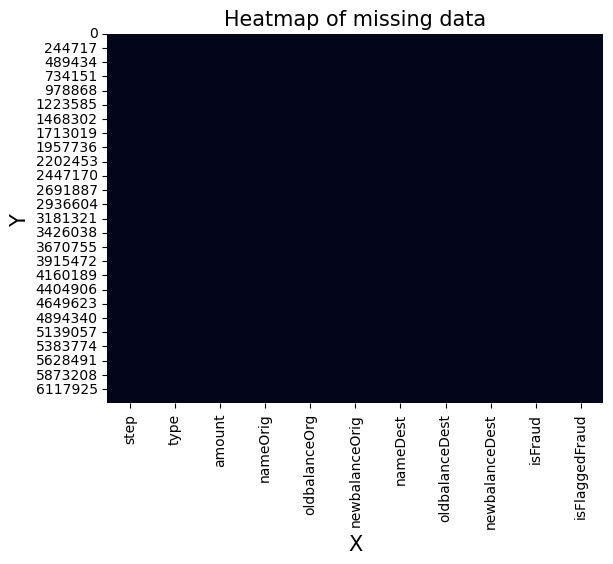

In [83]:
# heat map for checking null values
sns.heatmap(df.isnull(),cbar = False)
plt.title('Heatmap of missing data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

In [84]:
df1=df.copy()

In [85]:
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

amount             338078
oldbalanceOrg     1112507
newbalanceOrig    1053391
oldbalanceDest     786135
newbalanceDest     738527
dtype: int64


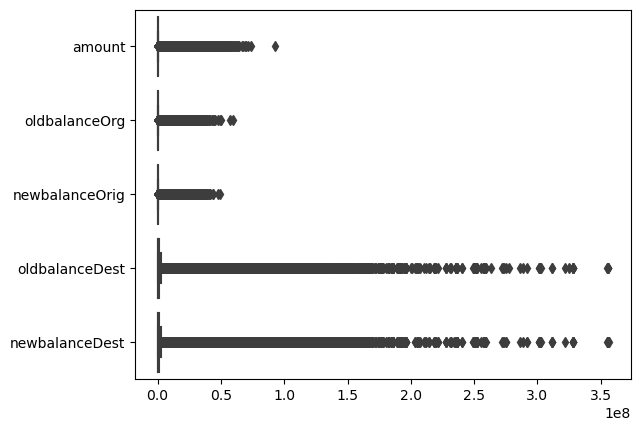

In [86]:
sns.boxplot(data=df1[numeric_columns], orient="h")

q1 = df1[numeric_columns].quantile(0.25)
q3 = df1[numeric_columns].quantile(0.75)
iqr = q3 - q1

# Determine upper and lower bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count number of outliers for each feature
num_outliers = ((df1[numeric_columns] < lower_bound) | (df1[numeric_columns] > upper_bound)).sum()

# Print number of outliers for each feature
print(num_outliers)

C:\TEMP\ipykernel_7540\2941940771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper] = upper
C:\TEMP\ipykernel_7540\2941940771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower] = lower
C:\TEMP\ipykernel_7540\2941940771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper] = upper
C:\TEMP\ipykernel_7540\2941940771.py:8: SettingWithCopyWarning: 
A value is trying to be

<Axes: >

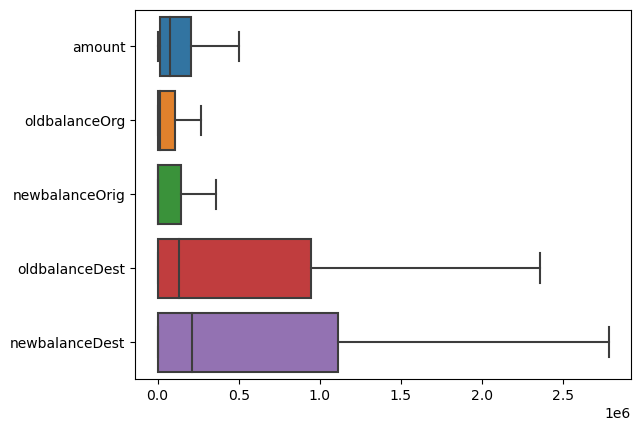

In [87]:
def treat_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    column[column > upper] = upper
    column[column < lower] = lower

# Treat outliers for each selected feature
for feature in numeric_columns:
    treat_outliers_iqr(df[feature])

sns.boxplot(data=df[numeric_columns], orient="h")


In [88]:
df.shape

(6362620, 11)

In [89]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [90]:
df["step"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [91]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# EDA

# Correlation between Features

C:\TEMP\ipykernel_7540\3124859992.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')


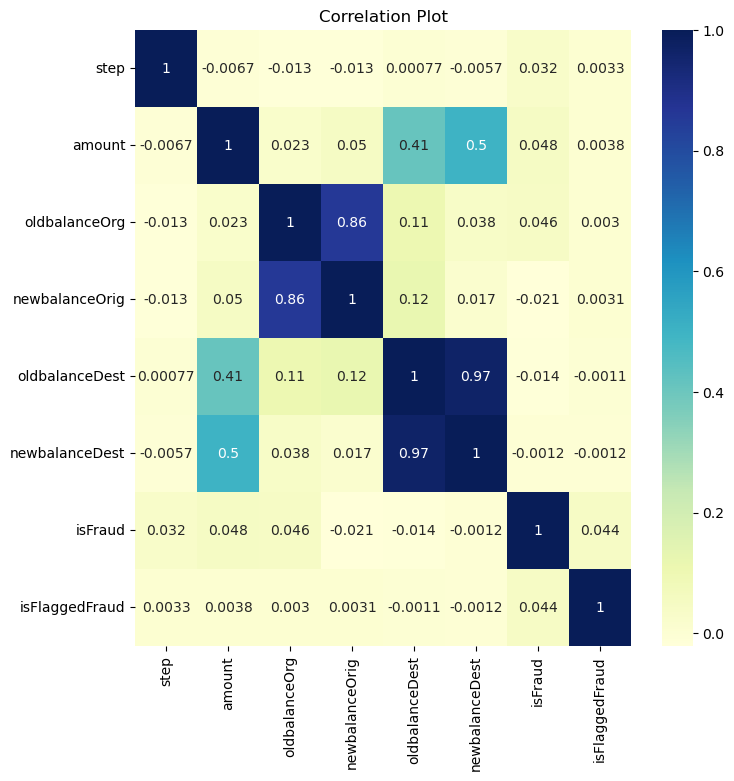

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')
plt.title('Correlation Plot')
plt.show()

In [94]:
#Observations:
#oldbalanceOrig & newbalanceOrig are highly correlated.
#oldbalanceDest & newbalanceDest are highly correlated.
#For rest of all there is no signifiacant correlation.
#For target variable isFraud, no feature is highly correlated.

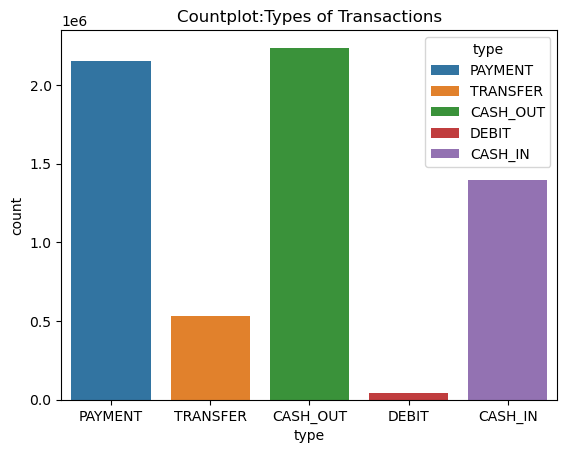

In [95]:
sns.countplot(data=df,x='type',hue='type',dodge=False)
plt.title('Countplot:Types of Transactions')
plt.show()

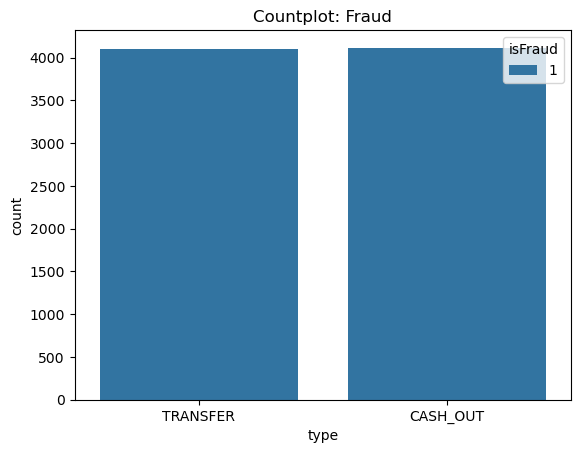

In [96]:
#plot
sns.countplot(data=df[df['isFraud']==1],x='type',hue='isFraud',dodge=False)
plt.title('Countplot: Fraud')
plt.show()
     

In [150]:
#identifying which type of transactions are isFraud
df['type'][df['isFraud']==1].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [151]:
# Filtering  fraud and valid types of transactions
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [152]:
# Observations
#There are 4 types of transactions - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
# Among those only CASH_OUT & TRANSFER are isFraud==1.

In [153]:
#As per dataset description provided the initials of nameOrig and nameDest denotes type of acccount.
#C : Customer
#M : Merchant

In [154]:
df['nameOrig'].str.contains('C').sum()


6362620

In [155]:
df['nameOrig'].str.contains('M').sum()


0

In [156]:
df['nameDest'].str.contains('M').sum()


2151495

In [157]:
df['nameDest'].str.contains('C').sum()


4211125

In [158]:
# Observation

# nameOrig feature doesnt have 'M' type account. All accounts are 'C'

# nameDest feature contains both 'C' and 'M' type acounts

In [159]:
# Based on the observation that if the recipient of a transaction has
# a name that starts with "M" (i.e., a merchant), 
# then it is not a fraud transaction also fraud occurs only 
# when the transaction is Transfer or Cash out from the given dataset. 
# Hence we can ignore such transactions for the purpose of detecting fraud.



In [160]:
df = df[~((df['nameDest'].str.startswith('M')) | (df["type"]=="DEBIT") | (df["type"]=="CASH"))]


In [161]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [109]:
print('Mean is = ',fraud['amount'].mean())
print('Min amount = ',fraud['amount'].min())
print('Max amount = ',fraud['amount'].max())

Mean is =  327897.98328777554
Min amount =  0.0
Max amount =  501719.33875


In [110]:
print('Mean is = ',valid['amount'].mean())
print('Min amount = ',valid['amount'].min())
print('Max amount = ',valid['amount'].max())

Mean is =  132013.8288494757
Min amount =  0.01
Max amount =  501719.33875


# Encoding the categorical varibale using one hot encoding

In [162]:
df=pd.get_dummies(df,columns=["type"],drop_first=True)
df
     

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
2,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,0,1
3,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1,0
15,1,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,1,0
19,1,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,0,1
24,1,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,1,0
6362616,743,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,1,0
6362618,743,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0,1


C:\TEMP\ipykernel_7540\1722893228.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=0.5)


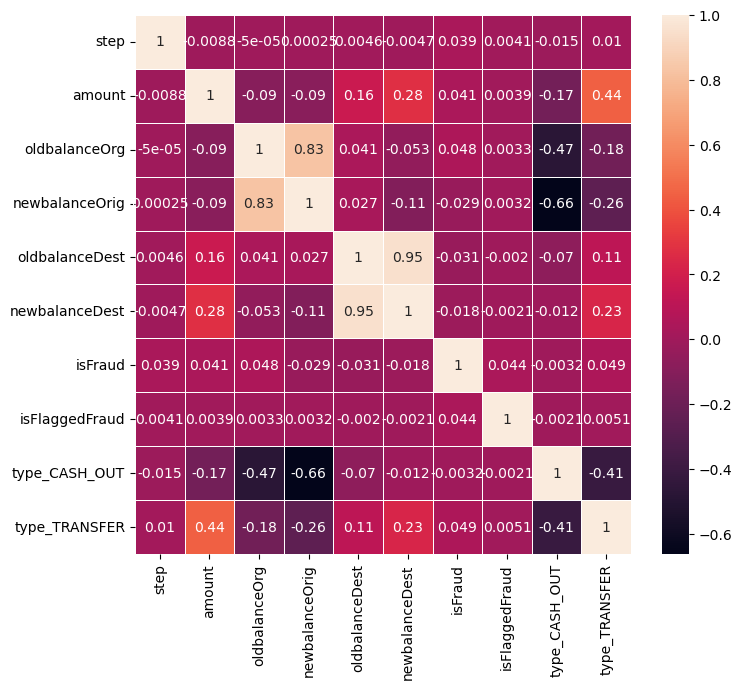

In [112]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)
plt.show()

In [ ]:
# The correlation table shows that there is multicollinearity between'oldbalanceOrg' and 'newbalanceOrig', as well as between 
# 'oldbalanceDest' and 'newbalanceDest'. Therefore, we will select the 'oldbalanceOrg' feature and drop the 'newbalanceOrig' feature
# Similarly, we will drop both the 'oldbalanceDest' and 'newbalanceDest' features due to multicollinearity and negative correlation.
# Additionally, we will also drop the 'name' feature, as it contains millions of unique values and is unlikely to be helpful in detecting fraudulent transactions.

In [113]:
df=df.drop(['nameOrig','nameDest','oldbalanceDest','newbalanceOrig', 'newbalanceDest'],axis=True)
df

,step,amount,oldbalanceOrg,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
2,1,181.00000,181.0000,1,0,0,1
3,1,181.00000,181.0000,1,0,1,0
15,1,229133.94000,15325.0000,0,0,1,0
19,1,215310.30000,705.0000,0,0,0,1
24,1,311685.89000,10835.0000,0,0,0,1
...,...,...,...,...,...,...,...
6362615,743,339682.13000,268287.9375,1,0,1,0
6362616,743,501719.33875,268287.9375,1,0,0,1
6362617,743,501719.33875,268287.9375,1,0,1,0
6362618,743,501719.33875,268287.9375,1,0,0,1


In [114]:
df1=df[df["isFraud"]==1]
len(df1)

8213

In [115]:
#Since the dataset is huge and very mininal amount of one class taking same number of sample from other class.

In [116]:
from random import sample
df2=df.sample(n=8300,replace=False,ignore_index=True)
len(df2)

8300

In [117]:
data=pd.concat([df1,df2],axis=0,ignore_index=True)
data

,step,amount,oldbalanceOrg,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
0,1,181.00,181.0,1,0,0,1
1,1,181.00,181.0,1,0,1,0
2,1,2806.00,2806.0,1,0,0,1
3,1,2806.00,2806.0,1,0,1,0
4,1,20128.00,20128.0,1,0,0,1
...,...,...,...,...,...,...,...
16508,328,387032.77,16757.0,0,0,1,0
16509,587,376076.88,22417.0,0,0,1,0
16510,14,68294.53,39830.0,0,0,1,0
16511,130,141981.69,14491.0,0,0,1,0


In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report
          

In [121]:
x=data.drop(["isFraud"],axis=1)
y=data["isFraud"]

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [132]:
scaler = StandardScaler()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [133]:
lr_param_grid = {'penalty': ['l2', 'l1'], 'C': [1.0, 1.5, 2.0]}
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}
rf_param_grid = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 15, 20, 25]}

In [134]:
cv=StratifiedKFold(n_splits=3)
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, scoring='roc_auc', cv=cv)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, scoring='roc_auc', cv=cv)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, scoring='roc_auc', cv=cv)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

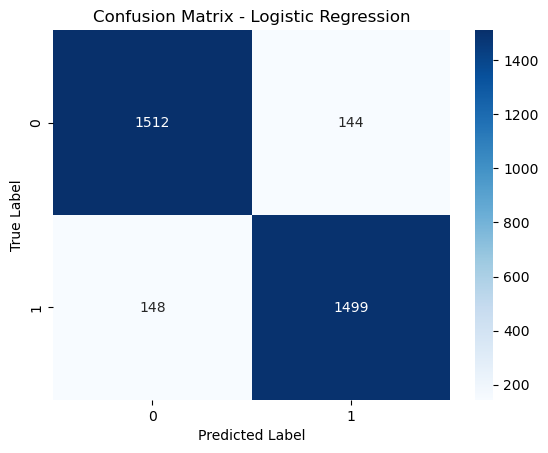

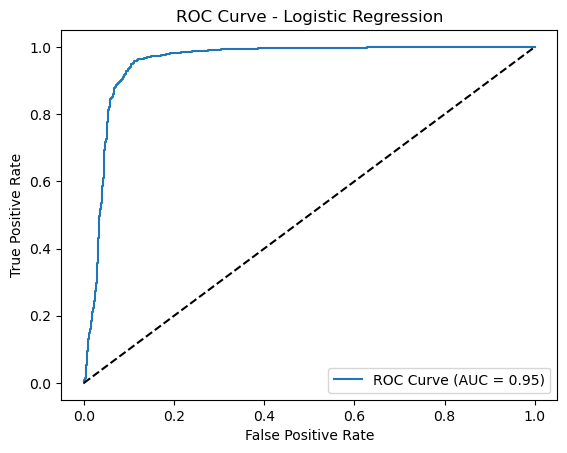

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1656
           1       0.91      0.91      0.91      1647

    accuracy                           0.91      3303
   macro avg       0.91      0.91      0.91      3303
weighted avg       0.91      0.91      0.91      3303




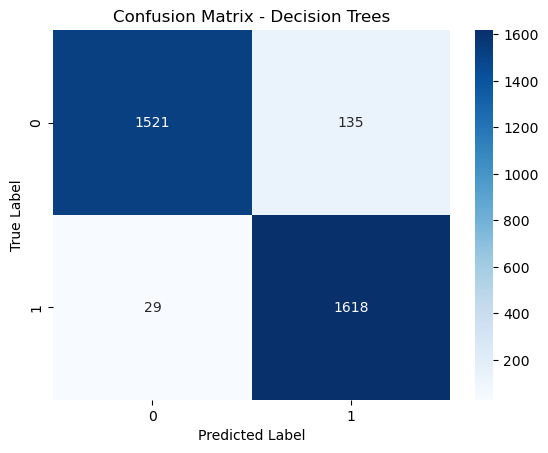

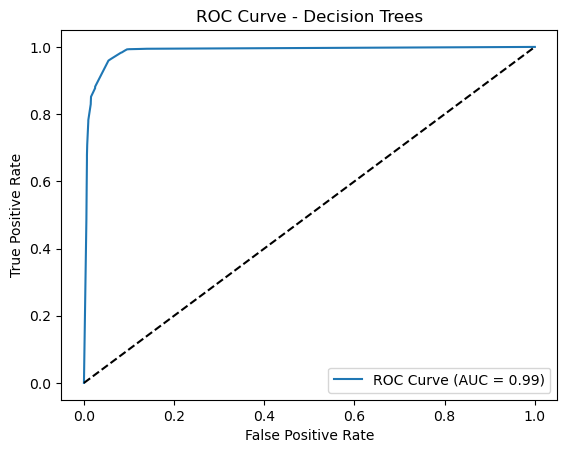

Decision Trees Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1656
           1       0.92      0.98      0.95      1647

    accuracy                           0.95      3303
   macro avg       0.95      0.95      0.95      3303
weighted avg       0.95      0.95      0.95      3303




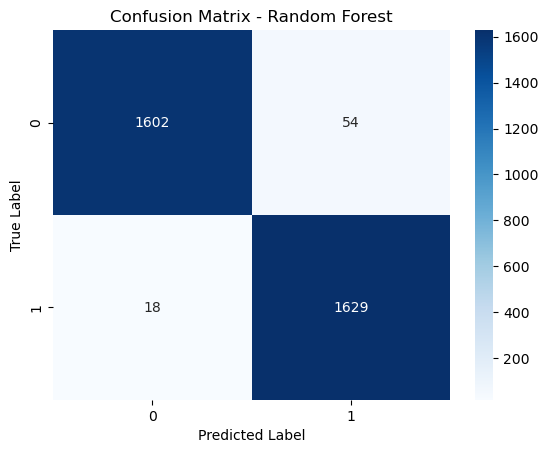

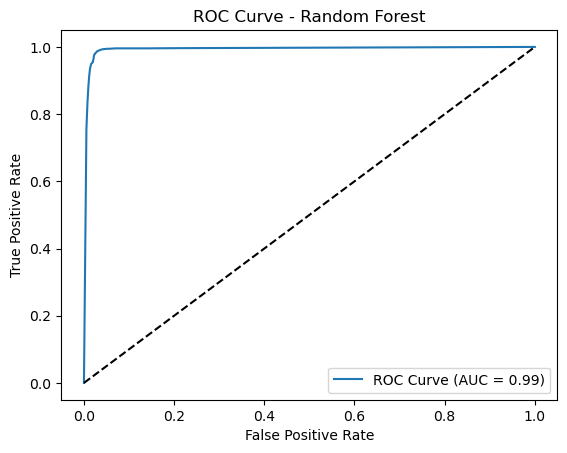

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1656
           1       0.97      0.99      0.98      1647

    accuracy                           0.98      3303
   macro avg       0.98      0.98      0.98      3303
weighted avg       0.98      0.98      0.98      3303




In [140]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

classifiers = [(lr_grid_search, 'Logistic Regression'), (dt_grid_search, 'Decision Trees'),
               (rf_grid_search, 'Random Forest')]

for model, name in classifiers:
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # ROC Curve
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(name))
    plt.legend(loc='lower right')
    plt.show()
    
    # Classification Report
    print('{} Classification Report'.format(name))
    print(classification_report(y_test, y_pred))
    print()

In [ ]:
# Observations
#  Random Forest is performing Excellent as compared to Logistic Regression and Decision tree

# CASE STUDY OPERATIONS

######    Q1. Data cleaning including missing values, outliers and multi-collinearity.
              a. Missing values: The code provided includes the use of the df.isnull().sum() function to check the number of missing values in each column. It also includes a heatmap visualization using sns.heatmap(df.isnull(), cbar=False) to visually represent the missing values in the dataset.
              b. Outliers: The code includes the identification and treatment of outliers using the Interquartile Range (IQR) method. It calculates the lower and upper bounds for outlier detection based on the first quartile (Q1) and third quartile (Q3) of numeric columns. It then replaces the outliers with the upper and lower bounds using the treat_outliers_iqr() function. Finally, it uses a boxplot to visualize the distribution of the numeric columns before and after outlier treatment.
              c. Multi-collinearity: The code drops certain features ('newbalanceOrig', 'oldbalanceDest', 'newbalanceDest') due to multicollinearity and negative correlation with other features. It uses a correlation heatmap (sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='YlGnBu')) to visualize the correlation between features and identify multicollinearity.

###### Q2. Describe your fraud detection model in elaboration.

          * As Fraud detection is a Binary type of classification task. The dataset provided is Labeled data. So we need ML models which support Supervised and binary types of data.
          * After doing EDA of the dataset I found that data is heavily imblanced so I need 
          performance evaluation metrics as : a. Confusion Matrix: To check TP,FP,FN,TN 
          b. Precision : Out of all datapoints predicted as Fraud,how many of them was actually fraud. 
          We want our model which will not miss any fraud transaction. 
          c. Recall: Out of all Fraud transactions how much of them were predicted fraud. 
          Because we want which will not classify fraud transaction as Valid transaction. 
          d. ROC_AUC: Tells us discriminative power of model between fraud and valid transactions.
          
          * So Model selection criteria becomes: a. Model which does binary classification b. Model which gives Probablity values along with class labels
          
          *  Due to this reason I selected Logistic Regression ,decision tree and Random Forest model. 
          a. Logistic Regression: Supports Binary classification by default and returns probablity values. 
          b. Random Forest: This is ensemble type of model. 
          The performance of these model is Superior because of combination of multiple base models. 
          Also this model Supports Binary classification and returns probablity values.



###### Q3.How did you select variables to be included in the model?

            * The correlation table shows that there is multicollinearity between 'oldbalanceOrg' and 'newbalanceOrig', 
            as well as between 'oldbalanceDest' and 'newbalanceDest'. Therefore, we will select the 'oldbalanceOrg' 
            feature and drop the 'newbalanceOrig' feature
            * Similarly, we will drop both the 'oldbalanceDest' and 'newbalanceDest' 
            features due to multicollinearity and  negative correlation.
            * Additionally, we will also drop the 'name' feature, as it contains
            millions of unique values and is unlikely to be helpful in detecting fraudulent transactions.
            * From feature importance it is very clear the feature "oldbalanceOrg","type_TRANSFER","type_cashout","amount" 
            alone give the better results

          
                 

###### Q4. Demonstrate the performance of the model by using best set of tools.
            * The code uses StratifiedKFold for cross-validation and evaluates the performance of the model using ROC AUC as the scoring metric.
            * It compares the performance of three models: Logistic Regression, Decision Trees, and Random Forest.
            * For each model, it displays the confusion matrix, ROC curve, and classification report.

###### Q5. What are the key factors that predict fraudulent customer?
         * abnormal transaction like high amount transfer
         * transaction history of customer
         * Mode of transfer,the timezone,device using for transaction
         * Rapid credit and debit of amounts.

###### Q6.Do these factors make sense? If yes, How? If not, How not?
          * Yes, these factors make sense as they are often associated with fraudulent activities.
          Unusual transaction amounts and types can indicate fraudulent behavior. 
          Deviations from regular customer behavior and patterns of 
          transfers to high-risk destinations can also be indicators of fraud.

###### Q7. What kind of prevention should be adopted while company update its infrastructure?
        * well structured security and access controls
        * conducting security tests at intervals
        * Highly updated software tools to access the customer details
        * Conducting security awareness training for employees
        * keep customer details and transaction details securely and 
       keep backup.

###### Q8. Assuming these actions have been implemented, how would you determine if they work?

        * We will deploy the fraud detection model. After the deployment, we will continuously monitor the 
        performance of the fraud detection model.
        * We will also periodically re-train the model by adding recent transaction data sets.
        * We will also analyze data drift - the change in the type of data as compared to the original trained data. We will analyze the changes in the distribution of the data and make improvements to model parameters accordingly.
        